In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [225]:
import sqlite3


In [226]:
con = sqlite3.connect(r"/Users/juancamarena/Downloads/password_data.sqlite")

In [227]:
pwdata = pd.read_sql_query("SELECT *FROM Users",con)

In [228]:
pwdata.shape

(100000, 3)

In [229]:
pwdata.head(5)

,index,password,strength
0,0,zxe870819,1
1,1,xw46454nr23l,1
2,2,soporte13,1
3,3,accounts6000webhost.com,2
4,4,c443balg,1


## Data Cleaning

In [321]:
pwdata.columns

Index(['password', 'strength', 'length'], dtype='object')

In [231]:
pwdata.drop(["index"], axis=1, inplace=True)


In [232]:
pwdata.head(5)

,password,strength
0,zxe870819,1
1,xw46454nr23l,1
2,soporte13,1
3,accounts6000webhost.com,2
4,c443balg,1


In [233]:
pwdata.dtypes

password    object
strength     int64
dtype: object

In [234]:
pwdata.duplicated().sum()

0

In [235]:
pwdata.isnull().any()

password    False
strength    False
dtype: bool

## Password Length

In [238]:
pwdata["password"][0]

'zxe870819'

In [239]:
len(pwdata["password"][0])

9

In [261]:

pwdata["length"] = pwdata["password"].str.len() 

## Frequency of Characters

In [262]:
password="Shan99"

In [263]:
[char for char in password if char.islower()]

['h', 'a', 'n']

In [264]:
len([char for char in password if char.islower()])

3

In [265]:
len([char for char in password if char.islower()])/len(password)

0.5

In [266]:
def freq_lowercase(row):
    return len([char for char in password if char.islower()])/len(row)

In [267]:

    
def freq_uppercase(row):
    return len([char for char in row if char.isupper()])/len(row)    

In [268]:
def freq_numerical_case(row):
    return len([char for char in password if char.isdigit()])/len(row)

In [269]:

data["lowercase_freq"] = np.round(pwdata["password"].apply(freq_lowercase) , 3)

data["uppercase_freq"] = np.round(pwdata["password"].apply(freq_uppercase) , 3)

data["digit_freq"] = np.round(pwdata["password"].apply(freq_numerical_case) , 3)

In [270]:
data.head(3)

,index,password,strength,lowercase_freq,uppercase_freq,digit_freq,special_char_freq,length
0,0,zxe870819,1,0.333,0.0,0.222,0,9
1,1,xw46454nr23l,1,0.250,0.0,0.167,0,12
2,2,soporte13,1,0.333,0.0,0.222,0,9


In [271]:
def freq_special_case(row):
    special_chars = []
    for char in row:
        if not char.isalpha() and not char.isdigit():
            special_chars.append(char)
    return len(special_chars)

In [272]:
#applying "freq_special_case" function

data["special_char_freq"] = np.round(pwdata["password"].apply(freq_special_case) , 3) 

In [273]:
data.head(5)

,index,password,strength,lowercase_freq,uppercase_freq,digit_freq,special_char_freq,length
0,0,zxe870819,1,0.333,0.0,0.222,0,9
1,1,xw46454nr23l,1,0.250,0.0,0.167,0,12
2,2,soporte13,1,0.333,0.0,0.222,0,9
3,3,accounts6000webhost.com,2,0.130,0.0,0.087,1,23
4,4,c443balg,1,0.375,0.0,0.250,0,8


## Descriptive Statistics

In [274]:
data.columns

Index(['index', 'password', 'strength', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq', 'length'],
      dtype='object')

In [275]:
data[["length","strength"]].groupby(['strength']).agg(["min","max","mean","median"])

length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0

In [277]:
cols = ['length','lowercase_freq','uppercase_freq',"digit_freq","special_char_freq"]

for col in cols:
    print(col)
    print(data[[col, 'strength']].groupby(['strength']).agg(["min","max","mean","median"]))

length
         length                       
            min  max       mean median
strength                              
0             1    7   6.550947    7.0
1             8   13   9.611074    9.0
2            14  220  15.953421   16.0
lowercase_freq
         lowercase_freq                        
                    min    max      mean median
strength                                       
0                 0.429  3.000  0.461267  0.429
1                 0.231  0.375  0.317794  0.333
2                 0.014  0.214  0.190040  0.188
uppercase_freq
         uppercase_freq                        
                    min    max      mean median
strength                                       
0                   0.0  1.000  0.012872  0.000
1                   0.0  0.923  0.007915  0.000
2                   0.0  0.889  0.367633  0.429
digit_freq
         digit_freq                        
                min    max      mean median
strength                                   
0         

## Data Visualization


In [278]:
data.columns

Index(['index', 'password', 'strength', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq', 'length'],
      dtype='object')

In [279]:
def get_dist(data, feature):
    
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    
    sns.violinplot(x='strength' , y=feature , data=data )
    
    plt.subplot(1,2,2)
    
    sns.distplot(data[data['strength']==0][feature] , color="red" , label="0" , hist=False)
    sns.distplot(data[data['strength']==1][feature], color="blue", label="1", hist=False)
    sns.distplot(data[data['strength']==2][feature], color="orange", label="2", hist=False)
    plt.legend()
    plt.show()
    

In [280]:
import warnings 
from warnings import filterwarnings
filterwarnings("ignore")

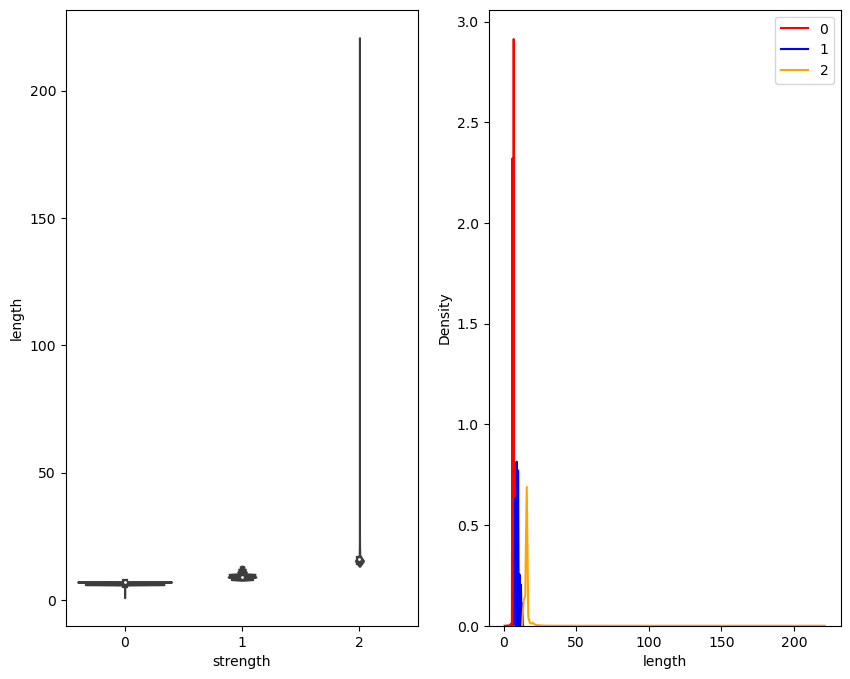

In [281]:
get_dist(data,"length")

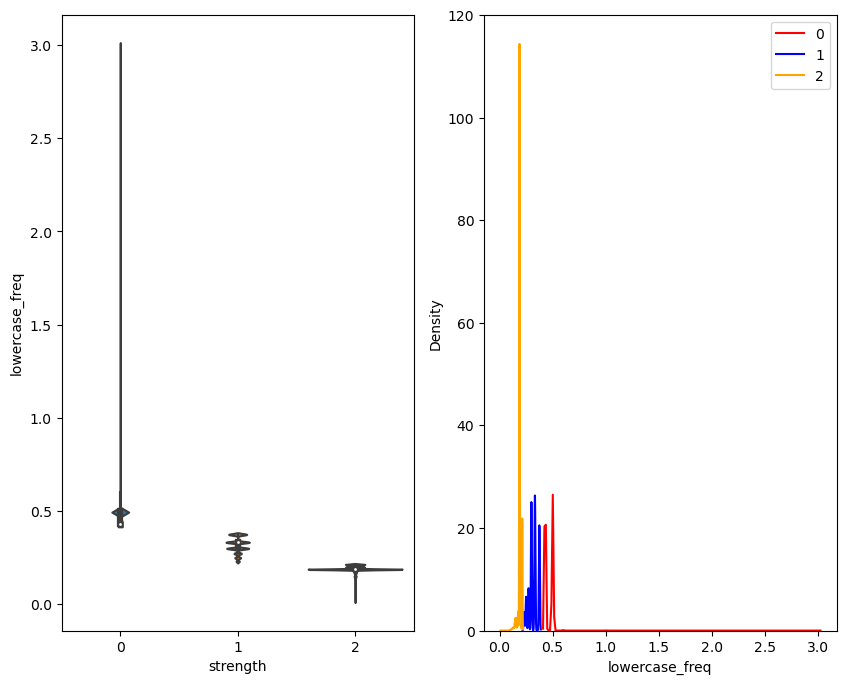

In [282]:
get_dist(data,"lowercase_freq")

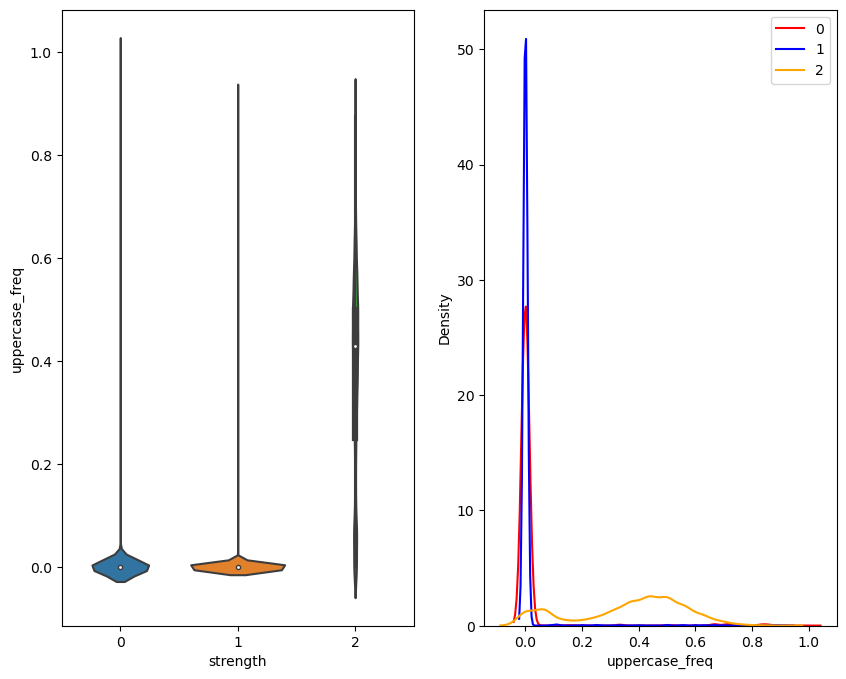

In [284]:
get_dist(data , 'uppercase_freq')

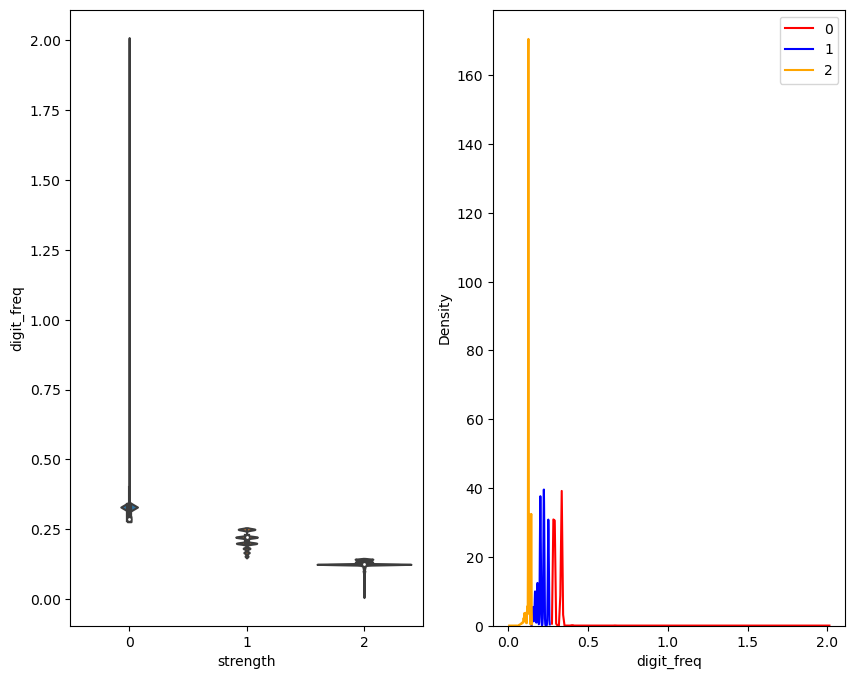

In [285]:
get_dist(data , 'digit_freq')

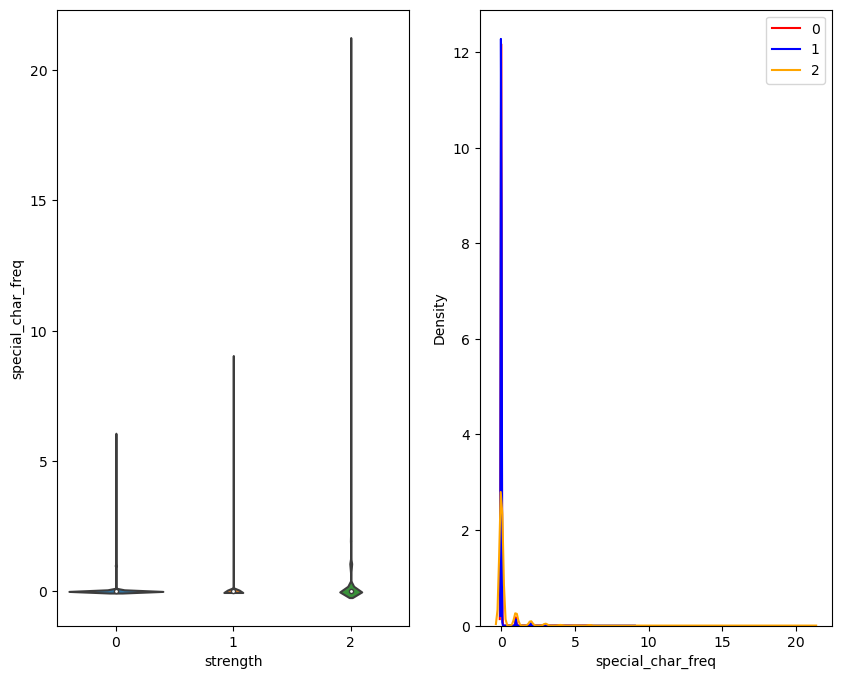

In [286]:
get_dist(data , 'special_char_freq')

## Applying TF_IDF on Data

In [288]:
data.head(4)

,index,password,strength,lowercase_freq,uppercase_freq,digit_freq,special_char_freq,length
0,0,zxe870819,1,0.333,0.0,0.222,0,9
1,1,xw46454nr23l,1,0.250,0.0,0.167,0,12
2,2,soporte13,1,0.333,0.0,0.222,0,9
3,3,accounts6000webhost.com,2,0.130,0.0,0.087,1,23


In [290]:
data

,index,password,strength,lowercase_freq,uppercase_freq,digit_freq,special_char_freq,length
0,0,zxe870819,1,0.333,0.0,0.222,0,9
1,1,xw46454nr23l,1,0.250,0.0,0.167,0,12
2,2,soporte13,1,0.333,0.0,0.222,0,9
3,3,accounts6000webhost.com,2,0.130,0.0,0.087,1,23
4,4,c443balg,1,0.375,0.0,0.250,0,8
...,...,...,...,...,...,...,...,...
99995,99995,obejofi215,1,0.300,0.0,0.200,0,10
99996,99996,fmiopvxb64,1,0.300,0.0,0.200,0,10
99997,99997,czvrbun38,1,0.333,0.0,0.222,0,9
99998,99998,mymyxe430,1,0.333,0.0,0.222,0,9


In [291]:
dataframe = data.sample(frac=1) 
#shuffling randomly for robustness of ML model 

In [292]:
dataframe

,index,password,strength,lowercase_freq,uppercase_freq,digit_freq,special_char_freq,length
68926,68926,matomaru01,1,0.300,0.000,0.200,0,10
42712,42712,jqs739mbz,1,0.333,0.000,0.222,0,9
37997,37997,midkcjbo534,1,0.273,0.000,0.182,0,11
3335,3335,pagina247web,1,0.250,0.000,0.167,0,12
26148,26148,97maxima,1,0.375,0.000,0.250,0,8
...,...,...,...,...,...,...,...,...
6453,6453,bdexgok4,1,0.375,0.000,0.250,0,8
27325,27325,1U3jnMTM1NwZie3A,2,0.188,0.438,0.125,0,16
63009,63009,123vietmatrix,1,0.231,0.000,0.154,0,13
40141,40141,KIVbeiDU1NgqQYiL,2,0.188,0.562,0.125,0,16


In [293]:
x=list(dataframe["password"])

In [298]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [300]:
vectorizer=TfidfVectorizer(analyzer="char")

In [302]:
X = vectorizer.fit_transform(x)

In [304]:
X.shape

(100000, 99)

In [305]:
dataframe[ "password"].shape

(100000,)

In [306]:
X

<100000x99 sparse matrix of type '<class 'numpy.float64'>'
	with 842571 stored elements in Compressed Sparse Row format>

In [307]:
X.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [309]:
X.toarray()[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.28910263, 0.22179425, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.42719165, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.5903773 ,
       0.        , 0.26245948, 0.        , 0.        , 0.2845239 ,
       0.        , 0.30289539, 0.3075784 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [310]:
dataframe["password"]

68926          matomaru01
42712           jqs739mbz
37997         midkcjbo534
3335         pagina247web
26148            97maxima
               ...       
6453             bdexgok4
27325    1U3jnMTM1NwZie3A
63009       123vietmatrix
40141    KIVbeiDU1NgqQYiL
20992           a25276757
Name: password, Length: 100000, dtype: object

In [311]:
len(vectorizer.get_feature_names_out())

99

In [313]:
vectorizer.get_feature_names_out()

array(['\x04', '\x06', '\x08', '\x0e', '\x10', '\x11', '\x17', ' ', '!',
       '#', '$', '%', '&', '(', ')', '*', '+', '-', '.', '/', '0', '1',
       '2', '3', '4', '5', '6', '7', '8', '9', ';', '<', '=', '>', '?',
       '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f',
       'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's',
       't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¨',
       '°', '±', '³', '´', 'µ', '·', 'ß', 'à', 'á', 'ä', 'æ', 'ç', 'é',
       'ê', 'í', 'ñ', 'ó', 'õ', 'ö', '÷', 'ú', 'ü', 'ý', 'þ', '›'],
      dtype=object)

In [317]:
df2=pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

In [319]:
df2

,,,,,,,,,!,#,...,ñ,ó,õ,ö,÷,ú,ü,ý,þ,›
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Applying Machine Learning Algorithm

In [323]:
dataframe.columns

Index(['index', 'password', 'strength', 'lowercase_freq', 'uppercase_freq',
       'digit_freq', 'special_char_freq', 'length'],
      dtype='object')

In [330]:
df2["length"]=dataframe["length"]
df2["lowercase_freq"]=dataframe["lowercase_freq"]

In [332]:
df2

,,,,,,,,,!,#,...,õ,ö,÷,ú,ü,ý,þ,›,length,lowercase_freq
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12,0.250
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23,0.130
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,0.375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.300
99996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10,0.300
99997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333
99998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9,0.333


In [333]:
y=dataframe['strength']

## Split Data into Train & Test

In [335]:
from sklearn.model_selection import train_test_split

In [336]:
X_train, X_test,Y_train,Y_test=train_test_split(df2,y,test_size=0.20)

In [337]:
X_train.shape

(80000, 101)

In [339]:
Y_train.shape

(80000,)

In [341]:
from sklearn.linear_model import LogisticRegression

## Apply Multinomial Logistic Regression 

In [343]:
clf=LogisticRegression(multi_class="multinomial")

In [344]:
clf.fit(X_train,Y_train)

LogisticRegression(multi_class='multinomial')

In [345]:
y_pred=clf.predict(X_test)

In [346]:
y_pred

array([1, 0, 1, ..., 1, 1, 1])

In [348]:
from collections import Counter

In [350]:
Counter(y_pred)

Counter({1: 16570, 0: 1575, 2: 1855})

## Prediction Using Sample Data

In [351]:
password="@%abcd123"

In [352]:
sample_array=np.array([password])

In [353]:
sample_matrix=vectorizer.transform(sample_array)

In [355]:
sample_matrix.toarray()

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.71897928, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14344586, 0.1659599 , 0.18587581, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.48741481, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.13814351, 0.23158091, 0.21637656,
        0.20807263, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.  

In [357]:
sample_matrix.toarray().shape

(1, 99)

In [382]:
password

'@%abcd123'

In [383]:
len(password)

9

In [384]:
[char for char in password if char.islower()]

['a', 'b', 'c', 'd']

In [385]:
len([char for char in password if char.islower()])/len(password)

0.4444444444444444

In [386]:
np.append(sample_matrix.toarray(),(9,0.444)).reshape(1,101).shape

(1, 101)

In [387]:
new_matrix=np.append(sample_matrix.toarray(),(9,0.444)).reshape(1,101)

In [388]:
clf.predict(new_matrix)

array([0])

## Automation

In [389]:
def predict():
   
    password = input("Enter a password : ")
    sample_array = np.array([password])
    sample_matrix = vectorizer.transform(sample_array)
    
    length_pass = len(password)
    length_normalised_lowercase = len([char for char in password if char.islower()])/len(password)
    
    new_matrix2 = np.append(sample_matrix.toarray() , (length_pass , length_normalised_lowercase)).reshape(1,101)
    result = clf.predict(new_matrix2)
    
    if result == 0 :
        return "Password is weak"
    elif result == 1 :
        return "Password is normal"
    else:
        return "password is strong"

In [395]:
predict()

Enter a password : shackwack!12


'Password is weak'

## Model Evaluation

In [391]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [392]:
accuracy_score(Y_test,y_pred)

0.8051

In [393]:
confusion_matrix(Y_test,y_pred)

array([[  822,  1904,     0],
       [  675, 13781,   356],
       [   78,   885,  1499]])

## Report

In [394]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.30      0.38      2726
           1       0.83      0.93      0.88     14812
           2       0.81      0.61      0.69      2462

    accuracy                           0.81     20000
   macro avg       0.72      0.61      0.65     20000
weighted avg       0.79      0.81      0.79     20000

